This notebook focuses reading data from files and analyzing large data sets with the python package ["pandas"](http://pandas.pydata.org/pandas-docs/version/0.15/tutorials.html). In particular, we are going to analyze 22 years (collected and recorded every 15 minutes) of water quality data collected at Elkhorn Slough, an estuary in Monterey Bay. To do this notebook, you will also need to download the "ELKSMWQ.csv" file. First things first, import necessary packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

Let's import the data set, a csv file that contains various measurements of water at Elkhorn slough. Pandas has the ability to read a variety of different types of data files, so we have to use the correct function to read our file, which is a csv (comma separated values) file. Be sure to change the path to whatever diretory you put the data file (ELKSMWQ.csv) in.

In [2]:
path = "/Users/erikmenke/UC-Merced/Computations/JupyterNotebooks/DataAnalysis/ElkhornSlough/338524/"
WaterFilename = "ELKSMWQ.csv"
WaterData = pd.read_csv(path+WaterFilename, header=2, skipfooter=51, engine='python')


There's quite a bit of data in the file that we don't need or care about, so let's get rid of some of the data columns. In addition, because of the way the data was collected, the pandas import can't tell what type of data is in the file. So, let's define what data type each column is.

In [3]:
WaterDataAbrev = WaterData.drop(['isSWMP','Historical','ProvisionalPlus','F_Record','F_Temp','F_SpCond','F_Sal','F_DO_pct','F_DO_mgl','F_Depth','F_cDepth','F_Level','cLevel','F_cLevel','F_pH','F_Turb','cDepth','Level','Turb','Unnamed: 28'], axis=1)
WaterDataAbrev=WaterDataAbrev.astype({'Temp':'float','SpCond':'float','Sal':'float','DO_pct':'float','DO_mgl':'float','Depth':'float','pH':'float'})
WaterDataAbrev.DateTimeStamp = pd.to_datetime(WaterDataAbrev.DateTimeStamp)


Let's see what's left!

In [4]:
WaterDataAbrev

,Station_Code,DateTimeStamp,Temp,SpCond,Sal,DO_pct,DO_mgl,Depth,pH
0,elksmwq,1996-04-01 00:00:00,16.1,46.12,30.0,114.9,9.4,1.40,8.4
1,elksmwq,1996-04-01 00:15:00,16.1,45.69,29.6,114.8,9.4,1.34,8.4
2,elksmwq,1996-04-01 00:30:00,16.2,46.19,30.0,114.5,9.4,1.28,8.4
3,elksmwq,1996-04-01 00:45:00,16.4,45.68,29.6,114.8,9.4,1.20,8.4
4,elksmwq,1996-04-01 01:00:00,16.4,45.85,29.8,114.7,9.4,1.13,8.4
5,elksmwq,1996-04-01 01:15:00,16.4,45.61,29.6,115.1,9.4,1.06,8.4
6,elksmwq,1996-04-01 01:30:00,16.4,45.62,29.6,114.2,9.3,0.99,8.4
7,elksmwq,1996-04-01 01:45:00,16.5,45.65,29.6,115.0,9.4,0.93,8.4
8,elksmwq,1996-04-01 02:00:00,16.5,46.33,30.1,113.8,9.3,0.86,8.4
9,elksmwq,1996-04-01 02:15:00,16.5,45.65,29.6,110.4,9.0,0.83,8.4


A few things to note about the data. First, there are 618,378 rows of data. That's a lot of data! Enough that even using a conventional program, like Excel, will be very slow and won't be able to handle some of what we might want to do. Second, there are 9 columns of data. The first column is the station code, just an identifier of where the data was collected. The second column is the time and date that the data was collected. The third column is the water temperature, in $^{o}$C. Note that some of the data entries are NaN (NaN = Not a Number), and others are -296.6 $^{o}$C. Those are obvious errors that we might want to take care of at some point. The fourth column is the specific conductivity of the water (in milliSiemens(mS)/cm), the fifth column is the salinity of the water (in practical salinity units(psu)), the sixth column is the amount of dissolved oxygen (in percent saturation), the seventh column is the amount of dissolved oxygen (in mg/L), the eighth column is the water depth of the measurement (in meters), and the ninth column is the pH of the water.

Let's see if there's any correlation between the columns.

In [5]:
WaterDataAbrev.corr()

,Temp,SpCond,Sal,DO_pct,DO_mgl,Depth,pH
Temp,1.000000,0.129813,-0.094820,0.085629,-0.336145,-0.623368,0.330008
SpCond,0.129813,1.000000,-0.026048,0.093891,-0.261187,-0.719658,0.281159
Sal,-0.094820,-0.026048,1.000000,-0.268967,0.484354,0.575597,-0.535952
DO_pct,0.085629,0.093891,-0.268967,1.000000,-0.213712,-0.383397,0.469576
DO_mgl,-0.336145,-0.261187,0.484354,-0.213712,1.000000,0.898521,-0.911232
Depth,-0.623368,-0.719658,0.575597,-0.383397,0.898521,1.000000,-0.842757
pH,0.330008,0.281159,-0.535952,0.469576,-0.911232,-0.842757,1.000000


There seems to be some correlation, in particular between the pH and dissolved oxygen and salinity, as well as between temperature and water depth. Now, let's try out some of the cooler features of pandas. First, let's set the date/time column as our index (the independent variable).

In [6]:
OrderedWaterData=WaterDataAbrev.set_index('DateTimeStamp')

Now we can have pandas do all sorts of statistical analysis for us, without us needing to worry about the details or rewrite algorithms. For example, let's look at the weekly average of the salinity:

In [7]:
OrderedWaterData.resample('W')['Sal'].mean()

DateTimeStamp
1996-04-07    30.505060
1996-04-14    30.767708
1996-04-21    31.256250
1996-04-28    30.792932
1996-05-05    33.284226
1996-05-12    32.844196
1996-05-19    31.301339
1996-05-26    31.848645
1996-06-02    32.493006
1996-06-09    31.615030
1996-06-16    31.741220
1996-06-23    31.461050
1996-06-30    34.475000
1996-07-07    34.753571
1996-07-14    33.079018
1996-07-21    31.834077
1996-07-28    32.492846
1996-08-04    30.465625
1996-08-11    30.288839
1996-08-18    29.712946
1996-08-25    29.581193
1996-09-01    32.983036
1996-09-08    31.143006
1996-09-15    30.770238
1996-09-22    30.541144
1996-09-29    31.085500
1996-10-06    29.222619
1996-10-13    29.083117
1996-10-20          NaN
1996-10-27    33.010196
                ...    
2017-11-05    33.464583
2017-11-12    32.788690
2017-11-19    32.459821
2017-11-26    32.269494
2017-12-03    32.919643
2017-12-10    33.414732
2017-12-17    33.535565
2017-12-24    33.438542
2017-12-31    33.148065
2018-01-07    32.537500
20

We can also graph the data for a certain period of time. For example, how did the salinity change from May, 1996, through June, 1996?

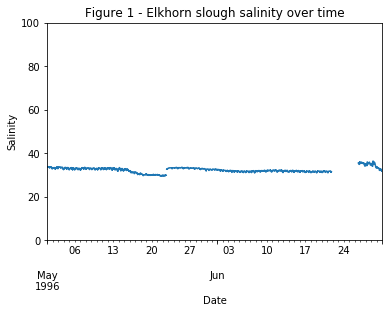

In [8]:
SalinityPlot = OrderedWaterData['1996-May':'1996-Jun']['Sal']
SalinityPlot.plot()
plt.title("Figure 1 - Elkhorn slough salinity over time")
plt.xlabel('Date')
plt.ylabel('Salinity')
ax = plt.gca()
ax.set_ylim(0,100)
plt.show()

Knowing that we can do some neat stuff, let's do that. I'm going to create a new data table for the data from the weekly averages, and put in the standard deviations. I'm going to ignore the depth column, though, because that doesn't seem very important to me, and a lot of the data entries are NaN.

In [9]:
weekly_summary = pd.DataFrame()
weekly_summary['Temp'] = OrderedWaterData.resample('W')['Temp'].mean()
weekly_summary['TempErr'] = OrderedWaterData.resample('W')['Temp'].std()
weekly_summary['SpCond'] = OrderedWaterData.resample('W')['SpCond'].mean()
weekly_summary['SpCondErr'] = OrderedWaterData.resample('W')['SpCond'].std()
weekly_summary['Sal'] = OrderedWaterData.resample('W')['Sal'].mean()
weekly_summary['SalErr'] = OrderedWaterData.resample('W')['Sal'].std()
weekly_summary['DO_pct'] = OrderedWaterData.resample('W')['DO_pct'].mean()
weekly_summary['DO_pctErr'] = OrderedWaterData.resample('W')['DO_pct'].std()
weekly_summary['DO_mgl'] = OrderedWaterData.resample('W')['DO_mgl'].mean()
weekly_summary['DO_mglErr'] = OrderedWaterData.resample('W')['DO_mgl'].std()
weekly_summary['pH'] = OrderedWaterData.resample('W')['pH'].mean()
weekly_summary['pHErr'] = OrderedWaterData.resample('W')['pH'].std()


What does it look like?

In [10]:
weekly_summary

,Temp,TempErr,SpCond,SpCondErr,Sal,SalErr,DO_pct,DO_pctErr,DO_mgl,DO_mglErr,pH,pHErr
DateTimeStamp,,,,,,,,,,,,
1996-04-07,16.591220,1.724669,46.870030,1.073929,30.505060,0.773155,95.431399,29.499533,7.707143,2.247789,8.252083,0.135045
1996-04-14,16.328571,1.377676,47.235060,1.351055,30.767708,0.976375,25.684524,24.457572,2.077083,1.963302,7.831399,0.141039
1996-04-21,15.392857,1.371873,47.927768,1.691262,31.256250,1.223682,11.230655,17.229722,0.926637,1.416011,7.780655,0.148256
1996-04-28,18.311579,1.788897,47.253549,1.029468,30.792932,0.742489,5.923379,16.266982,0.464706,1.281977,7.836241,0.080628
1996-05-05,17.938244,2.592252,50.679836,0.504622,33.284226,0.381097,96.279911,23.266789,7.437649,1.596941,7.545238,0.112715
1996-05-12,16.535714,1.848229,50.092679,0.328509,32.844196,0.266168,79.885119,17.651854,6.370833,1.290125,7.492708,0.111849
1996-05-19,17.548512,2.017974,47.957098,1.486571,31.301339,1.080479,95.481548,24.384607,7.551339,1.846921,7.541518,0.139253
1996-05-26,17.883886,1.218781,48.692907,2.223044,31.848645,1.623767,83.615813,16.830409,6.556777,1.310227,7.786145,0.182791
1996-06-02,16.170089,2.017113,49.622426,0.534047,32.493006,0.407707,76.541071,15.146332,6.152232,1.046886,7.852083,0.080211


Let's compare the weekly average salinity for 1997 with 2007, to see if there is a difference.

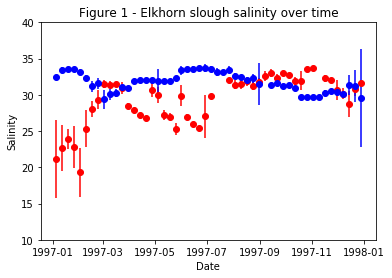

In [13]:
WeeklySalinityPlot1 = weekly_summary['1997-Jan':'1997-Dec']['Sal']
WeeklySalinityErr1 = weekly_summary['1997-Jan':'1997-Dec']['SalErr']

WeeklySalinityPlot2 = weekly_summary['2007-Jan':'2007-Dec']['Sal']
WeeklySalinityErr2 = weekly_summary['2007-Jan':'2007-Dec']['SalErr']

plt.errorbar(WeeklySalinityPlot1.index, WeeklySalinityPlot1, yerr = WeeklySalinityErr1, fmt='ro')
plt.errorbar(WeeklySalinityPlot1.index, WeeklySalinityPlot2, yerr = WeeklySalinityErr2, fmt='bo')
plt.title("Figure 1 - Elkhorn slough salinity over time")
plt.xlabel('Date')
plt.ylabel('Salinity')
ax = plt.gca()
ax.set_ylim(10,40)
ax.set_ylim
plt.show()

It looks to me that the salinity in 2007 (in blue) is higher than the salinity in 1997, at least in the early months.

Now, your task is to compare monthly averages of the pH, instead of weekly averages of salinity. First, create a new data frame, similar to above, but named monthly_averages and consisting of monthly averages and standard deviations.

Now that you've done that, graph the monthly average pH for 1998, 2003, and 2008 on the same graph.

Does the pH vary from year to year? Explain.

Enter answer here...